In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [2]:
with open('nomem_longsighted_0.01/act.pickle', 'rb') as fp:
    nm_act = pickle.load(fp)

with open('nomem_longsighted_0.01/order.pickle', 'rb') as fp:
    nm_order = pickle.load(fp)

with open('nomem_longsighted_0.01/reward.pickle', 'rb') as fp:
    nm_reward = pickle.load(fp)

In [3]:
with open('mem_longsighted_0.01/state.pickle', 'rb') as fp:
    state = pickle.load(fp)

with open('mem_longsighted_0.01/order.pickle', 'rb') as fp:
    order = pickle.load(fp)

with open('mem_longsighted_0.01/reward.pickle', 'rb') as fp:
    reward = pickle.load(fp)

In [4]:
window = 1000
tick_num = 4
n_ins = 10
n_agent = 2
act_sum = np.zeros((n_ins, window, n_agent))
order_sum = np.zeros((n_ins, window))
reward_sum = np.zeros((n_ins, window, n_agent))

for k in range(n_ins):
    act_sum[k, :, :] = np.array(nm_act[k])[-window:, :]
    order_sum[k, :] = np.array(nm_order[k])[-window:]
    reward_sum[k, :, :] = np.array(nm_reward[k])[-window:, :]

In [5]:
reward_sum.mean(), reward_sum.std()

(0.09295333333333333, 0.09735557702452273)

In [6]:
order_sum.mean(), order_sum.std()

(1.3546, 0.6645741794562892)

In [7]:
act_sum.mean(), act_sum.std()

(5.2, 4.106093033529563)

In [8]:
n_idx, n_val = np.unique(act_sum, return_counts=True)
n_freq = np.zeros(16)
n_freq[n_idx.astype(int)] = n_val
n_freq = n_freq/n_freq.sum() 

In [9]:
s_act = np.zeros((n_ins, window, n_agent))
s_order = np.zeros((n_ins, window))
s_reward = np.zeros((n_ins, window, n_agent))

for k in range(n_ins):
    s_act[k, :, :] = np.array(state[k])[-window:, :]
    s_order[k, :] = np.array(order[k])[-window:]
    s_reward[k, :, :] = np.array(reward[k])[-window:, :]

In [10]:
s_reward.mean(), s_reward.std()

(0.11227833333333333, 0.1192172073593219)

In [11]:
s_order.mean(), s_order.std()

(1.299, 0.6767562338094861)

In [12]:
s_idx, s_val = np.unique(s_act, return_counts=True)
s_freq = np.zeros(16)
s_freq[s_idx.astype(int)] = s_val
s_freq = s_freq/s_freq.sum()

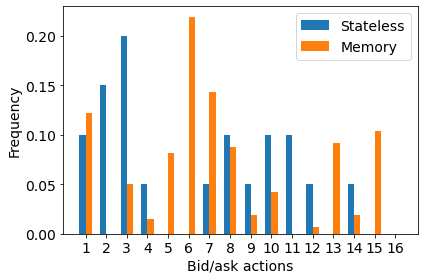

In [13]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
rects1 = ax.bar(x - width/2, n_freq, width, label='Stateless')
rects2 = ax.bar(x + width/2, s_freq, width, label='Memory')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xlabel('Bid/ask actions', fontsize=14)
ax.set_xticks(x, labels)
# ax.set_yticks(fontsize=14)
ax.legend(loc='best', fontsize=14)

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

# plt.show()
plt.savefig('mem.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)